## Task A :
1) Develop a program to create recommendation system to recommend products to a customer on any e-commerce website. 
    Recommendations should be based on the products consumer has searched on other sites like Google or Amazon. 

2) You can use any programming language to do this 

3) Create a sample data set for implementing the feature. 

4) Drive information by analysing the data set you have made and present valuable information from it in a presentable format.

## Product Recommendation System for e-commerce site
A recommendation system will help businesses improve their shopper's experience on website and result in better customer acquisition and retention.

The recommendation system, I have designed below is based on the journey of a new customer from the time he lands on the business’s website for the first time to when he makes repeat purchases.

When a new customer without any previous purchase history visits the e-commerce website for the first time, he is recommended the most popular products sold on the company's website. Once, he makes a purchase, the recommendation system updates and recommends other products based on the purchase history and ratings provided by other users on the website. The latter part is done using collaborative filtering techniques.

## Recommendation System - based on popular product
### Product popularity based recommendation system targeted at new customers
* Popularity based are a great strategy to target the new customers with the most popular products sold on a business's website and is very useful to start a recommendation engine.

#### Importing libraries

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import TruncatedSVD

#### Loading the dataset

In [92]:
e_commerce_ratings = pd.read_csv(r'C:\Users\YASHA\Downloads\E-commerce.csv')
e_commerce_ratings = e_commerce_ratings.dropna()
e_commerce_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [93]:
e_commerce_ratings.shape

(2023070, 4)

In [94]:
popular_products = pd.DataFrame(e_commerce_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


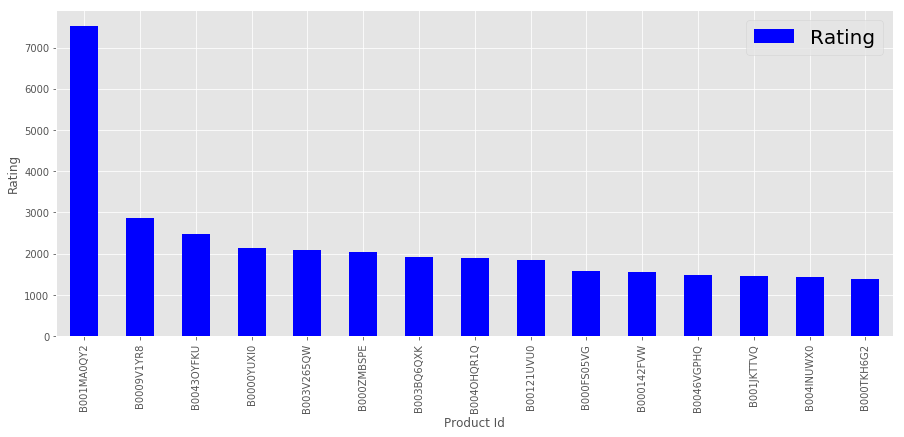

In [95]:
most_popular.head(15).plot(figsize=(15,6),kind = "bar", color = 'b')
plt.ylabel('Rating')
plt.xlabel('Product Id')
plt.legend(prop={'size': 20})

### Analysis:

* The above graph gives us the most popular products (arranged in descending order) sold by the business.

* For example, product, ID # B001MA0QY2 has sales of over 7000, 
  the next most popular product, ID # B0009V1YR8 has sales of  3000, etc.     

### Model using collaborative filtering 

* Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.
* A model based collaborative filtering technique is closen here as it helps in making predictinfg products for a particular user by identifying patterns based on preferences from multiple user data.

In [96]:
# Subset of e-commerce site Ratings

e_commerce_ratings1 = e_commerce_ratings.head(10000)

In [97]:
ratings_utility_matrix = e_commerce_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As expected, the utility matrix obtaned above is sparce, I have filled up the unknown values wth 0.

In [98]:
ratings_utility_matrix.shape

(9697, 886)

Transposing the matrix

In [99]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
X.shape

(886, 9697)

Unique products in subset of data

In [101]:
X1 = X

### Decomposing the Matrix

In [102]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

### Correlation Matrix

In [103]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

correlation_matrix

### Isolating Product ID # 6117036094 from the Correlation Matrix

Assuming the customer buys Product ID # 6117036094 (randomly chosen)

In [104]:
X.index[99]

'6117036094'

Index # of product ID purchased by customer

In [105]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [106]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

### Recommending top 10 highly correlated products in sequence

In [107]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['0205616461',
 '0762451459',
 '1304482634',
 '1304511073',
 '1304511081',
 '1304511138',
 '1304511146',
 '1304622223',
 '1304622460']

**Product Id # **
Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website. 

## Recommendation for new users
* For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in product description.

In [108]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

### Item to item based recommendation system based on product description

Applicable when business is setting up its E-commerce website for the first time

In [109]:
product_descriptions = pd.read_csv(r'C:\Users\YASHA\Downloads\product_descriptions.csv')
product_descriptions.shape

(124428, 2)

#### Checking for missing values

In [110]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [111]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

#### Feature extraction from product descriptions

Converting the text in product description into numerical data for analysis

In [112]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

#### Visualizing product clusters in subset of data

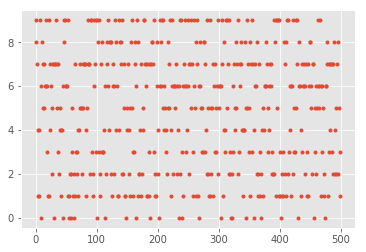

In [113]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++') # No. of clusters 
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()


F

In [114]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]: # No. of output or recommendation
        print(' %s' % terms[ind]),
    print

## Output
* Recommendation of product based on the current product selected by user.
* To recommend related product based on, Frequently bought together. 

#### Top words in each cluster based on product description

In [115]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 air
 cooling
 pressure
 unit
 cool
 conditioner
 room
 turn
 000
 control
Cluster 1:
 frame
 patio
 pole
 fabric
 ft
 base
 cutting
 dining
 cushions
 bronze
Cluster 2:
 door
 oven
 cooking
 cu
 interior
 ft
 painted
 proposition
 home
 nbsp
Cluster 3:
 lbs
 steel
 shelf
 capacity
 heavy
 easy
 duty
 storage
 fence
 construction
Cluster 4:
 water
 easy
 cycle
 wash
 air
 year
 provides
 performance
 heater
 energy
Cluster 5:
 light
 watt
 wall
 power
 led
 volt
 cabinet
 bulb
 bulbs
 white
Cluster 6:
 piece
 toilet
 flush
 design
 bowl
 installation
 finish
 tile
 easy
 look
Cluster 7:
 metal
 hole
 screw
 steel
 drill
 screws
 gauge
 20
 tool
 work
Cluster 8:
 concrete
 water
 paint
 insulation
 ft
 use
 brush
 used
 easy
 sq
Cluster 9:
 window
 rug
 vary
 product
 dimensions
 tape
 shades
 order
 size
 ft


#### Predicting clusters based on key search words

In [116]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

* **Keyword : ** cutting tool

In [117]:
show_recommendations("cutting tool")

Cluster 7:
 metal
 hole
 screw
 steel
 drill
 screws
 gauge
 20
 tool
 work


* **Keyword : **spray paint

In [118]:
show_recommendations("spray paint")

Cluster 8:
 concrete
 water
 paint
 insulation
 ft
 use
 brush
 used
 easy
 sq


* **Keyword : **steel drill

In [119]:
show_recommendations("steel drill")

Cluster 7:
 metal
 hole
 screw
 steel
 drill
 screws
 gauge
 20
 tool
 work


In case a word appears in multiple clusters, the algorithm chooses the cluster with the highest frequency of occurance of the word.

* **Keyword : **water

In [120]:
show_recommendations("water")

Cluster 4:
 water
 easy
 cycle
 wash
 air
 year
 provides
 performance
 heater
 energy


Once a cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product descriptions.

#### Summary: 

This works best if a business is setting up its e-commerce website for the first time and does not have user-item purchase/rating history to start with initally. This recommendation system will help the users get a good recommendation to start with and once the buyers have a purchased history, the recommendation engine can use the model based collaborative filtering technique.